<a href="https://colab.research.google.com/github/sunlight2018/hands_on_ml3_notebooks/blob/main/notebooks/03_exercise_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set.
Hint: the KNeighborsClassifier works quite well for this task;
you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame= False)
x, y = mnist.data, mnist.target


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
x.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [8]:
x_train.shape

(60000, 784)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier()
kn_clf.fit(x_train, y_train )

KNeighborsClassifier()

开始交叉验证，评估模型性能.
先建立基准。

In [11]:
baseline_accuracy = kn_clf.score(x_test, y_test)
baseline_accuracy

0.9688

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbors': [3,4,5,6]}]
grid_search = GridSearchCV(kn_clf, param_grid, cv= 5)
grid_search.fit(x_train[:10000], y_train[:10000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [21]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [22]:
grid_search.best_score_

np.float64(0.9441999999999998)

用上面的最佳参数来培训最终的模型，并在测试集上测试得分。

In [26]:
final_model = grid_search.best_estimator_.fit(x_train, y_train)

In [28]:
final_model.score(x_test, y_test)

0.9714

In [29]:
grid_search.score(x_test, y_test)

0.9714

下面来检查一下其他方面的得分，了解模型是不是真的好。

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_final = final_model.predict(x_test)

In [46]:
print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))

[[ 973    1    1    0    0    1    3    1    0    0]
 [   0 1132    2    0    0    0    1    0    0    0]
 [  10    5  995    2    1    0    0   16    3    0]
 [   0    1    3  974    1   14    1    7    4    5]
 [   1    5    0    0  950    0    4    3    0   19]
 [   4    0    0    9    2  862    7    1    3    4]
 [   4    2    0    0    3    3  946    0    0    0]
 [   0   17    4    0    3    0    0  994    0   10]
 [   5    2    4   14    5   11    4    4  920    5]
 [   3    4    2    7    9    4    1   10    1  968]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.97   

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# 找出真实为 8 但预测错了的样本索引
wrong_8_idx = np.where((y_test == 8) & (y_pred_final != 8))[0]

# 如果没有错误样本，则跳过绘图
if len(wrong_8_idx) == 0:
    print("模型对‘8’的预测全部正确，无可视化内容。")
else:
    N = min(12, len(wrong_8_idx))  # 最多显示12个
    fig, axes = plt.subplots(3, 4, figsize=(10, 8))

    for i, ax in enumerate(axes.flat):
        if i < N:
            idx = wrong_8_idx[i]
            image = x_test[idx].reshape(28, 28)

            # 自动归一化图像像素
            image = (image - image.min()) / (image.max() - image.min() + 1e-8)

            ax.imshow(image, cmap='gray')
            ax.set_title(f"True: 8, Pred: {y_pred_final[idx]}")
            ax.axis('off')
        else:
            ax.axis("off")

    plt.tight_layout()
    plt.show()

模型对‘8’的预测全部正确，无可视化内容。


In [50]:
print("x_test 值范围:", x_test.min(), x_test.max())  # 应该是 0~255
print("归一化后值范围:", (x_test[0].reshape(28, 28).astype('float')/255.0).min(),
                       (x_test[0].reshape(28, 28).astype('float')/255.0).max())  # 应该是 0.0~1.0

x_test 值范围: 0 255
归一化后值范围: 0.0 1.0


In [53]:
print("y_test dtype:", y_test.dtype)
print("y_pred_final dtype:", y_pred_final.dtype)
print("example:", y_test[0], y_pred_final[0])

y_test dtype: object
y_pred_final dtype: object
example: 7 7


In [54]:
print("Number of wrong predictions for class 8:", len(wrong_8_idx))
print("Sample indices:", wrong_8_idx[:5])

Number of wrong predictions for class 8: 0
Sample indices: []


In [56]:
print("y_test shape:", y_test.shape)
print("y_pred_final shape:", y_pred_final.shape)
print("y_test dtype:", y_test.dtype)
print("y_pred_final dtype:", y_pred_final.dtype)

y_test shape: (10000,)
y_pred_final shape: (10000,)
y_test dtype: object
y_pred_final dtype: object


In [59]:
y_test = y_test.astype(np.int32)
y_pred_final = y_pred_final.astype(np.int32)

wrong_8_idx = np.where((y_test == 8) & (y_pred_final != 8))[0]
print("预测错的8的数量：", len(wrong_8_idx))

预测错的8的数量： 54


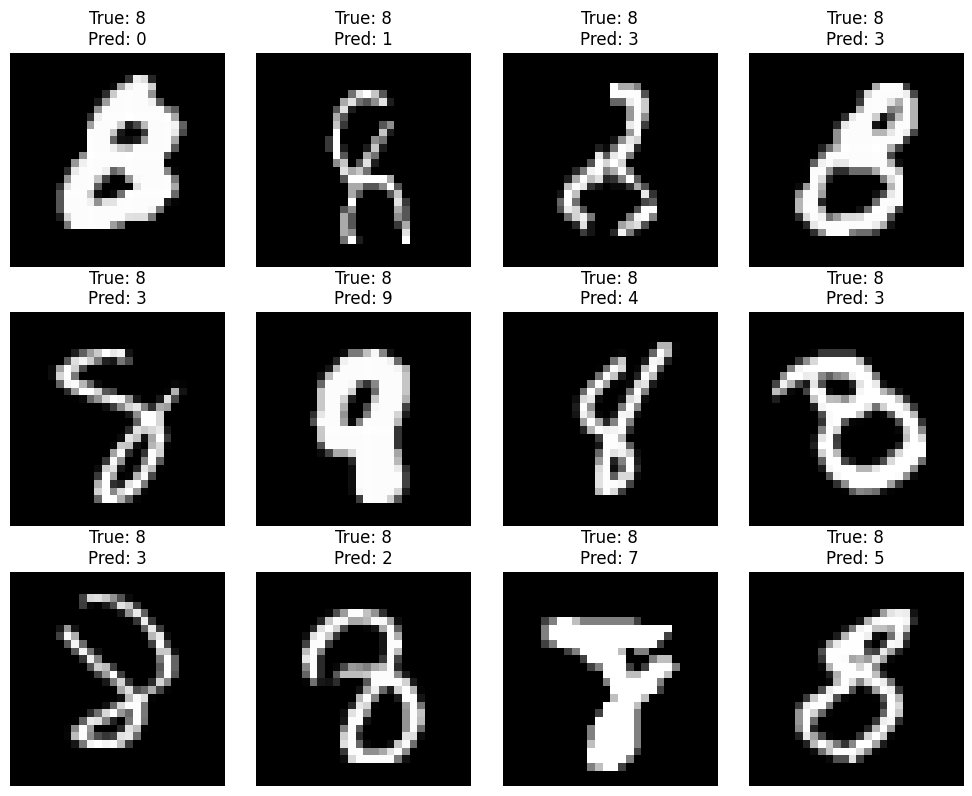

In [60]:
import matplotlib.pyplot as plt

N = min(12, len(wrong_8_idx))  # 最多画12个
fig, axes = plt.subplots(3, 4, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
    if i < N:
        idx = wrong_8_idx[i]
        image = x_test[idx].reshape(28, 28)
        ax.imshow(image, cmap='gray')
        ax.set_title(f"True: 8\nPred: {y_pred_final[idx]}")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()